<h1> Spotify Variables: Natural vs Manufactured Relationships</h1>

Spoify creates some if its variables based on data from other variables in order to create useful metrics for understanding music. For example, they create variables bounded by 0 and 1 to capture the latent concept of a songs "energy," "danceability" and "speechiness". In my portion of the project, I sought to understand how these metrics were produced. While many of these variables are propriatary and cannot be accessed with an API call, some of them are not. My goal was to understand how at least one of these metrics are created.

<h2> Research Questions </h2>

First, I used inductive reasoning to identify which variables were constructed, and which other variables were likely contenters for use in the creation of these variables. Next, I sought to discover the relationship between these variables as defined by the data scientists at Spotify.

The inductive question:

**1. "Which variables seem to have a relationship with one another in this dataset?"**

After preliminary data exploration, I identified the variables "energy", "danceibility, and "loudness" being a likely contenders. Once I established this, I asked the research question:


**2. "What is the relationship between the "energy" variable and other variables in this dataset?"**

Next, after discovering a plausible relationship between  I wanted to know if the relationship between "energy" and "danceability", I wanted to know if the relationship between these variables differed by genere. In other words:

**3. Do genres have differing relationships between "energy" and other variables of interest?**

Finally, after exploring this in detail, I wanted to use what I had learned to determine the true relationship between "energy," "danceability," and "loudness" as developed by the Spotify data scientists.

**4. What relationships do Spotify data scientsts use to to generate one or more of their variables?**

I determined that the variables "energy" "danceability", "loudness", and "tempo" shared a relationship, so I began testing models of each of these variables until I found one that I belived captured some true relationship. I created a model which I believe demonstrates a true relationship between these variables, as engineered by the data scientists at Spotify.

In [46]:
#Shared Dependencies
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

In [2]:
#My Dependencies (relevant to my portion of the project)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
import sklearn as sk
import seaborn as sns
from collections import Counter
from IPython.display import Image
import osimport statsmodels.api as sm

X = df["RM"]
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()import statsmodels.api as sm

X = df["RM"]
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()import statsmodels.api as sm

X = df["RM"]
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

SyntaxError: invalid syntax (&lt;ipython-input-2-9509396cb3f2&gt;, line 9)

In [ ]:
from config import cid
from config import secret
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
cleansed="../Final_project/cleansed.csv"
master="master.csv"
weights="weights.csv"
grouped="grouped_data.csv"

In [7]:
cleansed_df=pd.read_csv("../Final_project/cleansed_df.csv")

<h2> Creating a weighted dataset </h2>
As a team, we collected 100 songs from each genre from Spotify's API. This means that the data is naturally biased, since some genres are overrepresented. Here, I began the process of weighting the dataset by genre. The goal was to look at the the 50 newest releases, and to weight the data based on how often generes came up in these tracks. Unfortunately, this process was never completed. Some barriers to this method were:

**1.There were too many genres to meaningfully weight the dataset given the limits that are placed on how much data we can pull in with a single API call. **

**2.Time limitations on this project created constraints on what I could prioritize.**

Nevertheless, I feel confident in my results, and I will defend them below. 

In [ ]:
#################################################
###Getting a weighted Dataset by Recent Genres###
#################################################

#--- collect 50 new releases
news = sp.new_releases(country=None, limit=50, offset=0)
newlist=[]
for i in range(0,49):
    newlist.append(news["albums"]["items"][i]["artists"][0]['id'])
    
#--- get the genres
rep_genres=[]
for i in range(len(newlist)):
    artist = sp.artist("spotify:artist:"+ newlist[i])
    genre_group=(artist["genres"])

    rep_genres.append(genre_group)
            
#--- Put in flat list
rep_list = []
for sublist in rep_genres:
    for item in sublist:
        rep_list.append(item)
        
        
#---Get counts
weighted_dict = Counter(rep_list)
new_dict={}
for key, value in weighted_dict.items():
    new_dict[key] = value
    
#---Drop genres with counts of 1 
#---(Too many genres, sample too small. This is my solution)
noone_dict={}
for key, value in new_dict.items():
    if value!=1:
        noone_dict[key]=value
    else:
        continue
        
#... to be continued. This was hard.

<h2>Defining Functions </h2>
Before beginning my analysis, I defined some functions that would be useful. These were:
    
    1. A regression function
    
    2. A scatter function
   

In [ ]:
#Define function for simple linear regression
def reg(d,i,f):
    dataframe= f[[d,i]]
    dataframe.plot.scatter( x=[d] , y=[i])
    
    x= dataframe[[d]]
    y= dataframe[[i]]
    
    model=LinearRegression()
    model.fit(x,y)
    beta=model.coef_
    alpha=model.intercept_
    yline=model.predict(x)
    plt.scatter(x,y)
    plt.plot(x, yline,"r")
    Rsquare=r2_score(y, yline)


    plt.title(f"{d} by {i}")
    plt.xlabel(f"{d}")
    plt.ylabel(f"{i}")
    
#----Display coeficient, intercept, and R^2
    print(f"\u03B2 ={beta}")
    print(f"\u03B1 ={alpha}")
    print(f"R^2={Rsquare}")
    plt.savefig(f"outputs/regress{d}_{i}.png")
    plt.show()

In [ ]:
#Define function for scatter
def scatter(d,i,f):
    dataframe= f[[d,i]]
    dataframe.plot.scatter( x=[d] , y=[i])
    
    x= dataframe[[d]]
    y= dataframe[[i]]
    plt.scatter(x,y)


    plt.title(f"{d} by {i}")
    plt.xlabel(f"{d}")
    plt.ylabel(f"{i}")
    plt.savefig(f"outputs/scatter{d}_scatter_{i}.png")

    plt.show()

<h2>Q1: "Which variables seem to have a relationship with one another in this dataset?" </h2>

I conducted correlation analysis and  created scatter plots to look for possible relationships.
I did this mostly by hand, looking at each chart individually, but later I found two commands to make this easier, depicted below. Here, you can see that the distribution of the variabels mostly do not have obvious relationships, however the energy variable seems associated with the danceability variable, as well as the loudness variable.

In [ ]:
sns.pairplot(cleansed_df)
plt.savefig("all_scatters.png")

A correlation analysis also reveals an interesting relationship between energy and loudness

In [ ]:
print (cleansed_df.corr())

<h2>Q2: "What is the relationship between the "energy" variable and other variables in this dataset?"</h2>
    Next, it was time to conduct regression analyses to analyze these relationships more carefully.

<h3> Energy and Danceability</h3>
I regressed the energy variable against the danceability variable to see if a song's danceability were determined in part by a song's energy (or rather, if Spotify might use one variable to artificially define the other). It looks like they have a quadratic relationship, with a high level of overall variation.

In [ ]:
scatter("Danceability","Energy", cleansed_df)


There is a problem however. Even though I want danceability to be my dependent variable in this analysis (the idea being that engergy is a causal factor in a song's danceability) I cannot express the data visually this way because the fit line would not express a function. In order for one variable to be a function of the other, there must be exactly one value of Y for every value of X. Here, there appears to be two. I flipped the IV and the DV, understanding that the underlying relationship would ultimately be the same.

In [ ]:
scatter("Energy","Danceability", cleansed_df)


We can see here visually that the relationship is quadratic: a linear regression line does not fit the data.

In [ ]:
reg("Energy","Danceability", cleansed_df)

A parabola fits the data nicely.
(Note: seaborn does not provide slope and intercept. I am still working on figuring out how to collect these and to establish statistical significance using Python. Later though, I will demonstrate that the relationship is significant using different methods).

In [ ]:
sns.lmplot("Energy","Danceability", cleansed_df, line_kws={'color': 'red'}, order=2)
title="energy_dance_parabola"
plt.savefig(f"outputs/sns{title}.png")

<h2> Q3: Does the relationship between energy and danceability vary by genre?</h2>
First, I created a list of substantively interesting genres based on my own discretion as a researcher. I chose a handful of genres that I thought most people could identify easily. Next, I created a scatter plot fitting the quadratic relationship for each of these genres. As you can see, the relationship between each genre visually differs in a very visible way. Some of these scatterplots are too close to each other to discern a unique relationship clearly, but others are very distinct in terms of their overall levels of danceability and the strength of the curve.

In order to know for certain that these are unique relationships, we would need two things (besides measures of overall model robustness) that are not provided here:
1. an analysis of the difference between means in terms of danceability for each of these variables, in order to determine that the genres represent unique musical populations.
2. An analysis of the difference between beta values, to determine if the slopes in each relationship were significantly different from one another.

In [ ]:
#Generate a list of substantively interesting genres.
#Method: researcher's careful judgment (That's academic language for 
#I made it up. Suggestions for a better list are welcomed.)
substantive_list=["classical","country","electronic","jazz","hip-hop","rock","pop"]

In [ ]:
#Compare the relationship for each genre.
#It looks like pop music and rock music have the most "normal" looking relationship.
#We can also see that different genres have very different average energy distributions.

subs_df=cleansed_df.loc[cleansed_df["Genre"].isin(["classical","country","electronic","jazz","hip-hop","rock","pop"])]
sns.lmplot(x="Energy", y="Danceability", data=subs_df ,order=2, hue="Genre")
title="genrelist_parabolas"
plt.savefig(f"outputs/sns{title}.png")

The relative position of the genres on this chart is reproduceable with repeated API calls. The results raise some interesting questions. Why is the energy and danceability of classical music so low compared to other genres? Why is the curve associated with "Pop" music  more regular and predictible than the other genres? Why is the hip-hop genre lacking in any visual assocation along the same curve? Is this random chance, or is there something unique about these genres which set them apart? Is this a true characteristic of the population, or is this a function of the processes Spotify uses in order to define these two metrics?

In order to shed more light on these questions, I created a separate chart for each of the genres in my substantively-interesting genre list. The results do not provide clear answers, but they are worth considering.

In [ ]:
#Compare the relationship for each genre using a separate chart.
for genre in substantive_list:
    tempframe=cleansed_df.loc[cleansed_df["Genre"]==genre]
    sns.lmplot(x="Energy", y="Danceability", data=tempframe, order=2, line_kws={'color': 'red'})
    plt.title(f"Energy by Danceability for {genre.title()} Music")
    plt.xlabel(f"Energy")
    plt.ylabel(f"Daneability")
    title="by_genre"
    plt.savefig(f"outputs/{title}_{genre}.png")

<h2> Q4: "What relationships do Spotify data scientsts use to to generate their "energy" variable?" </h2>

At this point, I was running out of time for this project, and I still did not have any beta values or the ability to demonstrate statistical significance. I am not giving up on this goal! However in order to achieve a sense of personal satisfaction, I plugged the data into STATA and compared several models of danceability. The final model is very promising. There seems to be a quadratic relationship whereby danceability is a function of loudness and tempo. I believe that energy, danceability, or both are created using the two other variables. Here is my reasoning:

1. I already knew that spotify gets their "Danceability" variable through a combination of tempo, loudness, and some propriatery variables that I don't have access to. They do not specify what kind of relationship, but we already have good reason to suspect that it is quadratic. Here is an image of the documentation taken from the Spotify website:

In [ ]:
Image(filename='outputs/spotify_energy.PNG') 


2.Based on this information I created a simple linear regression equation with all of these IVs and with Daneability as the DV.

In [ ]:
#Based on this information I created a simple linear regression equation with all of
#these IVs and with Daneability as the DV.

Image(filename="../outputs/reg_dance_energy_tempo_loud.PNG")

3. The t-score on tempo was huge, so I thought there might be a multicolinearity issue. I tested for this by looking at the correlations of the IVs. I found that energy and loudness are much too correlated to include both in this analysis. This shouldn't be surprising, since we already know that loudness and tempo #are both used to calculate energy. I decided to drop energy from the analysis.

In [ ]:
Image(filename="../outputs/corr_energy_tempo_loud.PNG")

When I did this, The t-scores for both of the other variables increased and the F score increased. #The R^2 value decreased, but only marginally. This means that we have a better-fitting model that explains about the same amount of variation in danceability.

<img src= "../outputs/reg_dance_tempo_loud.PNG">

4. We saw before that we have good reason to believe that the relationship is quadratic, so I created quadratic terms
for the equation on both remaining variables. Both were statistically significant.

In [ ]:
Image(filename="../outputs/reg_dance_loud__tempo_quad.PNG") 

4. Now its time to test whether or not I still need the linear term in the equation
even after adding the quadratic one. I ran two models to test this,  each one isolating
the regular and quadratic terms as IVs. In both cases, both terms remained statistically
significant (there is a problem with the tempo-squared term however, but I did not notice this until later, so I'll discuss it later in this document)

In [ ]:
Image(filename="../outputs/reg_dance_loudsq_loud.PNG")

In [ ]:
Image(filename="../outputs/reg_dance_temposq_tempo.PNG")

4. Next, I tested the model with squared terms only (they turned out to be significant)
Rather than display them all, here's the final model of danceability (about 18% of the variance in danceability explained).

In [ ]:
Image(filename="../outputs/final_model.PNG")

Given that this model predicts danceability so well, and that we already knew that the energy variable is based on these two measures, I wondered if maybe the energy variable was generated using the same quadratic formula I made to predict danceability, so I ran that model next (below). Note: I thought this was my final model at the time, hence the file name and highlighted high R-squared value, but I explain correct my error in the next cell



In [ ]:
Image(filename="../outputs/final_energy.PNG")

This model looks *very* good, because it explains over 60 percent of the variance in energy. There is a problem however. The unreasonably large standard error on the squared term for the tempo variable indicates a multicolinearity issue. This term does not belong in the model. Next, I dropped that term. Here is the *real* final model below:

In [ ]:
Image(filename="../outputs/TRUE_final_model.PNG")

<h2> Results: A (More Rigorous) Model Explaining over 60% of the variation in Energy</h2>
The R squared value is ~0.64, which is very high. F is significant, and all variables are significant with large t-scores and reasonable-sized standard errors.

Based on these results, we have good reason to believe that Spotify uses these variables in their model when they generate their "energy" variable for music tracks. One way we could refine this model further would be to do model comparative statistics using AIC and BIC.

Conclusion:
We have empirical evidence that Spotify creates their energy variable as a quadratic function of loudness and a linear function of tempo.

--------------------------------------------------------------------
<h2> Bonus Round! Try to get R-squared as high as possible while explaining the "energy" variable</h2>
For fun, I decided to see if I could build a model using the variables at my disposal to maximize R-squared while maintaining reasonable standard errors and in which all independent variables are significant predictors of the dependent variable, "energy". Adding and removing variables in the absense of theory or hypotheses is NOT best practice, and it is not a reliable way to learn about the data. I do not intend this to be a serious model of Spotify's "danceability" variable, This is just a fun exercise. 

In order to maximize the amount of variance explained by my model I conducted backward stepwise regression on our original linear terms only, adding variables to the model based on the critera of 5% confidence (p<=0.05). Disappointingly, every variable made the cut.  The final R-squared value on this was greater than we achieved in our final model for "energy" above. This model explains approximately 68% of the variance in song energy. The only variable which had an unreasonable standard error in this model was song duration. Next, I tried forward stepwise regression with every linear variable at the same confidence level, and the results were exactly the same. 

In [ ]:
Image(filename="../outputs/backward_stepwise_energy.PNG")

Next, I added in the squared "loudness" term, since we  demonstrated earlier that this is a likely *real* predictor of energy. This brought the R-squared value to 0.6964; just shy of 70% of the variance explained. I really wanted to push that number to 0.7, so I tried generating more quadratic terms to throw into the model, but all to no avail; they either had multicolinearity issues and threw up impossibly large standard errors, or else they were statistically significant but did not impact overall model-fit. Given this limited dataset, I feel confident that I achieved the "best fitting model" (quantitatively, but not substantively!) that I could possibly achieve. Here is the final non-substantive, just-for-fun model of "energy". 

In [ ]:
Image(filename="../outputs/inflated_model_energy.PNG")

In [ ]:
cleansed_df.columns

In [10]:
# Assign the data to X and y
cleansed_df["Loudness_sq"]=cleansed_df["Loudness"]**2
x = cleansed_df[["Loudness", "Loudness_sq","Tempo"]]
y = cleansed_df["Energy"].values.reshape(-1, 1)
print(x.shape, y.shape)

0817, 3) (10817, 1)


In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn import feature_selection

# Fitting our model with all of our features in X
model.fit(x, y)
predictions = model.predict(x)
predictions_shaped=predictions.reshape(-1, 1)
predictions_final=np.round(predictions_shaped, 3)
#F=sk.metrics.f1_score(y, predictions_final)
f=sk.feature_selection.f_regression(x,y)
Rscore = model.score(x, y)
print(f"R2 Score: {Rscore}, F Score, p-value: {f}")
mse=sk.metrics.mean_squared_error(y, predictions_shaped)
print(mse)
df=3
dfr=10813
rss=mse*dfr
#mss
mss=0
for i in range(0,len(y)):
    yhat=predictions_shaped[i]-np.mean(y)
    yhatsq=yhat**2
    mss+=yhatsq
#msm
msm=mss/df
#

NameError: name &#39;sk&#39; is not defined

In [ ]:
model.fit(x,y)

In [ ]:
predictions = model.predict(x)
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [31]:
def regress(*args):
    #import dependencies
    import sklearn as sk
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    from sklearn import feature_selection
    #define arguments
    dataframe=args[0]
    y=args[1]
    xvars=[]
    for i in range(2,len(args)):
        xvars.append(args[i])
    x = dataframe[[item for item in xvars]]
    y = dataframe[y].values.reshape(-1, 1)
    #fit the model
    model.fit(x,y)
    #Generate Fit Statistics
    ##betas , intercepts, and p-values
    betas=model.coef_
    intercept=model.intercept_
    ##degrees of freedom, model
    df_m=len(xvars)
    ##degrees of freedom, error
    df_e=len(y)-len(xvars)
    Rscore = model.score(x, y)
    Ftest=sk.feature_selection.f_regression(x,y)
    predictions = model.predict(x).reshape(-1, 1)
    MSE=sk.metrics.mean_squared_error(y, predictions)
    ##mss
    MSS=0
    for i in range(0,len(y)):
        yhat=predictions[i]-np.mean(y)
        yhatsq=yhat**2
        MSS+=yhatsq
    print(betas)
    print(intercept)

In [218]:
def regress(*args):
    #import dependencies
    import sklearn as sk
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    from sklearn import feature_selection
    import statsmodels.api as sm

    #define arguments
    dataframe=args[0]
    y=args[1]
    xvars=[]
    for i in range(2,len(args)):
        xvars.append(args[i])
    x = dataframe[[item for item in xvars]]
    y = dataframe[y].values.reshape(-1, 1)
    #fit the model
    model.fit(x,y)
    #Generate Fit Statistics
    ##betas , intercepts, and p-values
    betas=model.coef_
    intercept=model.intercept_
    ##degrees of freedom, model
    df_m=len(xvars)
    ##degrees of freedom, error
    df_e=len(y)-len(xvars)
    Rscore = model.score(x, y)
    Ftest=sk.feature_selection.f_regression(x,y)
    predictions = model.predict(x).reshape(-1, 1)
    MSE=sk.metrics.mean_squared_error(y, predictions)
    ##mss
    MSS=0
    for i in range(0,len(y)):
        yhat=predictions[i]-np.mean(y)
        yhatsq=yhat**2
        MSS+=yhatsq
    print(betas)
    print(intercept)

    list=[]
    for item in xvars:
        list.append(f' + {item}')
    string="".join(list)
    newstring=string[3:]

    ind=args[1]
    ind=ind.strip('"')
 
    from patsy import dmatrices
    Y,X = dmatrices(f"{ind} ~ {newstring}", data=df, return_type="dataframe")
    ols = sm.OLS(Y, X)
    ols_result = ols.fit()
    print(ols_result.summary())

    #Plot the Residuals
    print("\n Residual Plot")
    predictions = model.predict(x)
    plt.scatter(predictions, predictions - y, color='coral',linewidths=0.5)
    plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='brown', linewidth=3)
    plt.show()

[[0.00073497 0.06134697 0.00084571]]
[0.99865932]
                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     6401.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        08:58:11   Log-Likelihood:                 5107.3
No. Observations:               10817   AIC:                        -1.021e+04
Df Residuals:                   10813   BIC:                        -1.018e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P&gt;|t|      [0.025      0.975]
-----------------------------------------------------------------------------

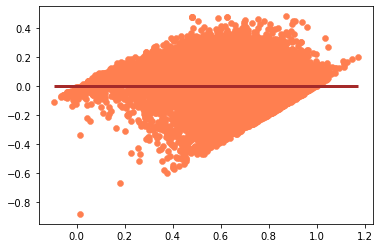

In [219]:
regress(cleansed_df,"Energy","Tempo","Loudness", "Loudness_sq")

In [91]:
    list=[]
    for item in xvars:
        list.append(f" + '{item}'")
    string="".join(list[1 :])
    string[3 :]
    

&quot;&#39;Tempo&#39; + &#39;Loudness&#39;&quot;

In [114]:
list=[]
xvars=("Tempo","Loudness", "Energy")
for item in xvars:
    list.append(f" + {item}")
list="".join(list)
list[3 :]


&#39;Tempo + Loudness + Energy&#39;

In [115]:
list=[]
    for item in xvars:
        list.append(f' + {item}')
    string="".join(list[1 :])
    newstring=string[3 :]
    
    from patsy import dmatrices
    df2=cleansed_df[[item for item in xvars]]
    Y,X = dmatrices(f"'{args[1]}' ~ {string}", data=df2, return_type="dataframe")
    ols = sm.OLS(Y, X)
    ols_result = ols.fit()
    print(ols_result.summary())

IndentationError: unexpected indent (&lt;ipython-input-115-b15c9bc9b1bb&gt;, line 2)

In [116]:
    xvars=["Energy","Tempo","Loudness"]
    list=[]
    for item in xvars:
        list.append(f" + {item}")
    string="".join(list[1 :])
    string[3 :]
    

&#39;Tempo + Loudness&#39;

In [75]:
import statsmodels.api as sm
from patsy import dmatrices
df=cleansed_df[["Energy","Tempo","Loudness","Loudness_sq"]]
Y,X = dmatrices("Energy ~ Tempo + Loudness + Loudness_sq", data=df, return_type="dataframe")
ols = sm.OLS(Y, X)
ols_result = ols.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     6401.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:55:27   Log-Likelihood:                 5107.3
No. Observations:               10817   AIC:                        -1.021e+04
Df Residuals:                   10813   BIC:                        -1.018e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P&gt;|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9987      0.008    118.961   